In [1]:
import pandas as pd
import matplotlib
%matplotlib inline

In [2]:
df = pd.read_csv('./train.csv')
df.head(5)

,movie_id,year,synopsis,genres
0,30924,2005,Cruel But Necessary is the story of Betty Muns...,Drama
1,34841,2012,"Yorkshire, 1974, the Maynard family moves into...",Drama Horror Thriller
2,23408,2017,When a renowned architecture scholar falls sud...,Drama
3,39470,1996,The story dealt with Lord Rama and his retalia...,Children Drama
4,7108,2003,A Thai playboy cons a girl into bed and then l...,Comedy Drama Horror Thriller


In [3]:
df['synopsis_len'] = df['synopsis'].apply(lambda x: len(x.split()))

In [4]:
df.head(5)

,movie_id,year,synopsis,genres,synopsis_len
0,30924,2005,Cruel But Necessary is the story of Betty Muns...,Drama,116
1,34841,2012,"Yorkshire, 1974, the Maynard family moves into...",Drama Horror Thriller,67
2,23408,2017,When a renowned architecture scholar falls sud...,Drama,50
3,39470,1996,The story dealt with Lord Rama and his retalia...,Children Drama,23
4,7108,2003,A Thai playboy cons a girl into bed and then l...,Comedy Drama Horror Thriller,52


array([[<AxesSubplot:title={'center':'synopsis_len'}>]], dtype=object)

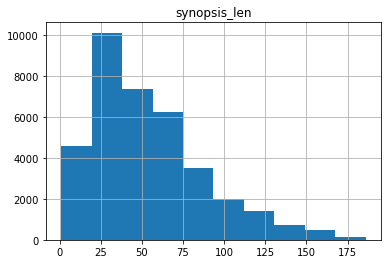

In [5]:
hist = df.hist(column='synopsis_len')
hist

In [6]:
df['synopsis_len'].max()

186

In [7]:
df = df[['movie_id', 'synopsis', 'genres']]
df.head(5)

,movie_id,synopsis,genres
0,30924,Cruel But Necessary is the story of Betty Muns...,Drama
1,34841,"Yorkshire, 1974, the Maynard family moves into...",Drama Horror Thriller
2,23408,When a renowned architecture scholar falls sud...,Drama
3,39470,The story dealt with Lord Rama and his retalia...,Children Drama
4,7108,A Thai playboy cons a girl into bed and then l...,Comedy Drama Horror Thriller


In [8]:
df['genres'] = df['genres'].apply(lambda x: x.split())
df.head(5)

,movie_id,synopsis,genres
0,30924,Cruel But Necessary is the story of Betty Muns...,[Drama]
1,34841,"Yorkshire, 1974, the Maynard family moves into...","[Drama, Horror, Thriller]"
2,23408,When a renowned architecture scholar falls sud...,[Drama]
3,39470,The story dealt with Lord Rama and his retalia...,"[Children, Drama]"
4,7108,A Thai playboy cons a girl into bed and then l...,"[Comedy, Drama, Horror, Thriller]"


In [9]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
yt = mlb.fit_transform(df['genres'])
# Getting a sense of how the tags data looks like
print(yt[0])
print(mlb.inverse_transform(yt[0].reshape(1,-1)))
print(mlb.classes_)

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
[('Drama',)]
['Action' 'Adventure' 'Animation' 'Children' 'Comedy' 'Crime'
 'Documentary' 'Drama' 'Fantasy' 'Film-Noir' 'Horror' 'IMAX' 'Musical'
 'Mystery' 'Romance' 'Sci-Fi' 'Thriller' 'War' 'Western']


In [10]:
type(yt)

numpy.ndarray

In [13]:

type(df['synopsis'].values)

numpy.ndarray